## Time Series 

In [15]:
!pip install seaborn

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib_inline as plt
import matplotlib.pyplot as plt


In [10]:
path = "/workspaces/A01_H09/book_sales.csv"
df = pd.read_csv(path, index_col = 'Date', parse_dates=['Date'])

df.head()

,Paperback,Hardcover
Date,,
2000-04-01,199,139
2000-04-02,172,128
2000-04-03,111,172
2000-04-04,209,139
2000-04-05,161,191


In [11]:
# zaman serilerinde iki tane ozellik var, biri gecikme suresi (lag) digeri zaman ozellikleri

# Zaman Serisi Ozellikleri
# Zaman Kuklasi Ozelligi: En erken vakitenn en son vakite kadar giden sayim anlamina gelir

df['Time'] = np.arange(len(df.index))
df.head()

,Paperback,Hardcover,Time
Date,,,
2000-04-01,199,139,0
2000-04-02,172,128,1
2000-04-03,111,172,2
2000-04-04,209,139,3
2000-04-05,161,191,4


In [12]:
# Zaman kuklasi ile dogrusal regresyon su modeli uretir.
# hedef = agirlik * zaman + onyargi
# Zaman kuklasi daha sonra egrileri bir zaman grafiginde zaman serilerine uydurmamizi saglar, burada zaman x eksenini olusturur
# zaman kuklasi --> time dummy

Text(0.5, 1.0, 'Sert Kapakli Kitaplarin Zamana Dayali Satis Adetleri')

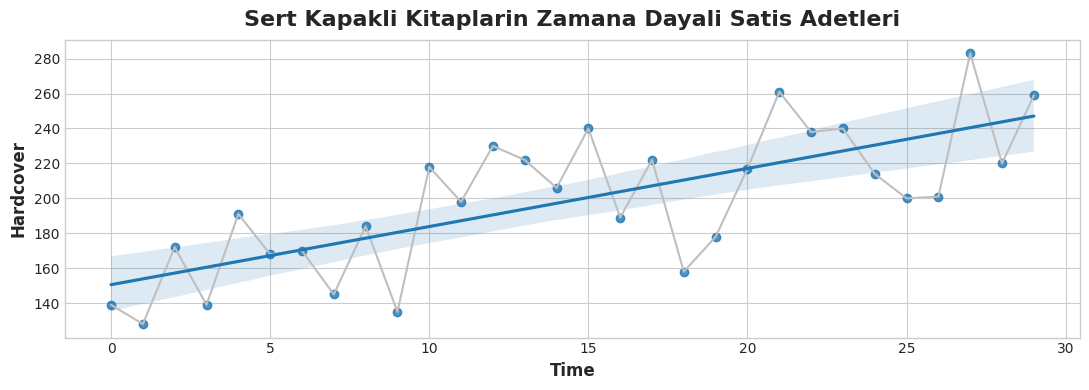

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.available  # whitegrid adini bulmak icin
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data = df, color = '0.75')
ax = sns.regplot(
    x = 'Time',
    y = 'Hardcover',
    data = df,
)
ax.set_title('Sert Kapakli Kitaplarin Zamana Dayali Satis Adetleri')

In [22]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns=['Hardcover', 'Lag_1'])
df

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0
2000-04-04,139,172.0
2000-04-05,191,139.0
2000-04-06,168,191.0
2000-04-07,170,168.0
2000-04-08,145,170.0
2000-04-09,184,145.0


Text(0.5, 1.0, 'Sert Kapakli Kitaplarin Lag1 ile Karsilastirmasi')

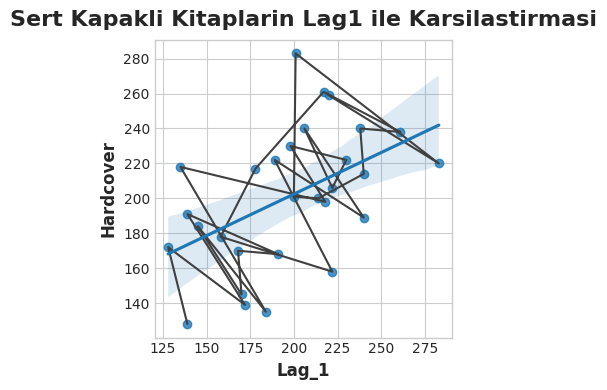

In [25]:
# hedef = agirlik * lag + onyargi  # formulumuz

plt.style.use("seaborn-v0_8-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

fig, ax = plt.subplots()
ax.plot('Lag_1', 'Hardcover', data = df, color = '0.25')
ax = sns.regplot(
    x = 'Lag_1',
    y = 'Hardcover',
    data = df,
)
ax.set_aspect('equal')
ax.set_title('Sert Kapakli Kitaplarin Lag1 ile Karsilastirmasi')

In [ ]:
# Ikinci ornek tunel grafigi
# orj kaynaga bak


In [32]:
import pandas as pd
from warnings import simplefilter

simplefilter("ignore")  

plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
)
%config InlineBackend.figure_format = 'retina'


p = "/workspaces/A01_H09/tunnel.csv"
tunnel = pd.read_csv(p, parse_dates=["Day"])

tunnel = tunnel.set_index("Day")
tunnel = tunnel.to_period()

tunnel.head()


,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [33]:
df  = tunnel.copy()
df['Time'] = np.arange(len(tunnel.index))
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [ ]:
from sklearn.linear_model import LinearRegression

X = df.loc[: , ['Time']] 
y = df.loc[: , 'NumVehicles'] 

model = LinearRegression()
model.fit(X,y)

y_pred = pd.Series(model.predict(X) , index = X.index)

# Tasitlar = 22,5 * Zaman + 99176  formul bu imis

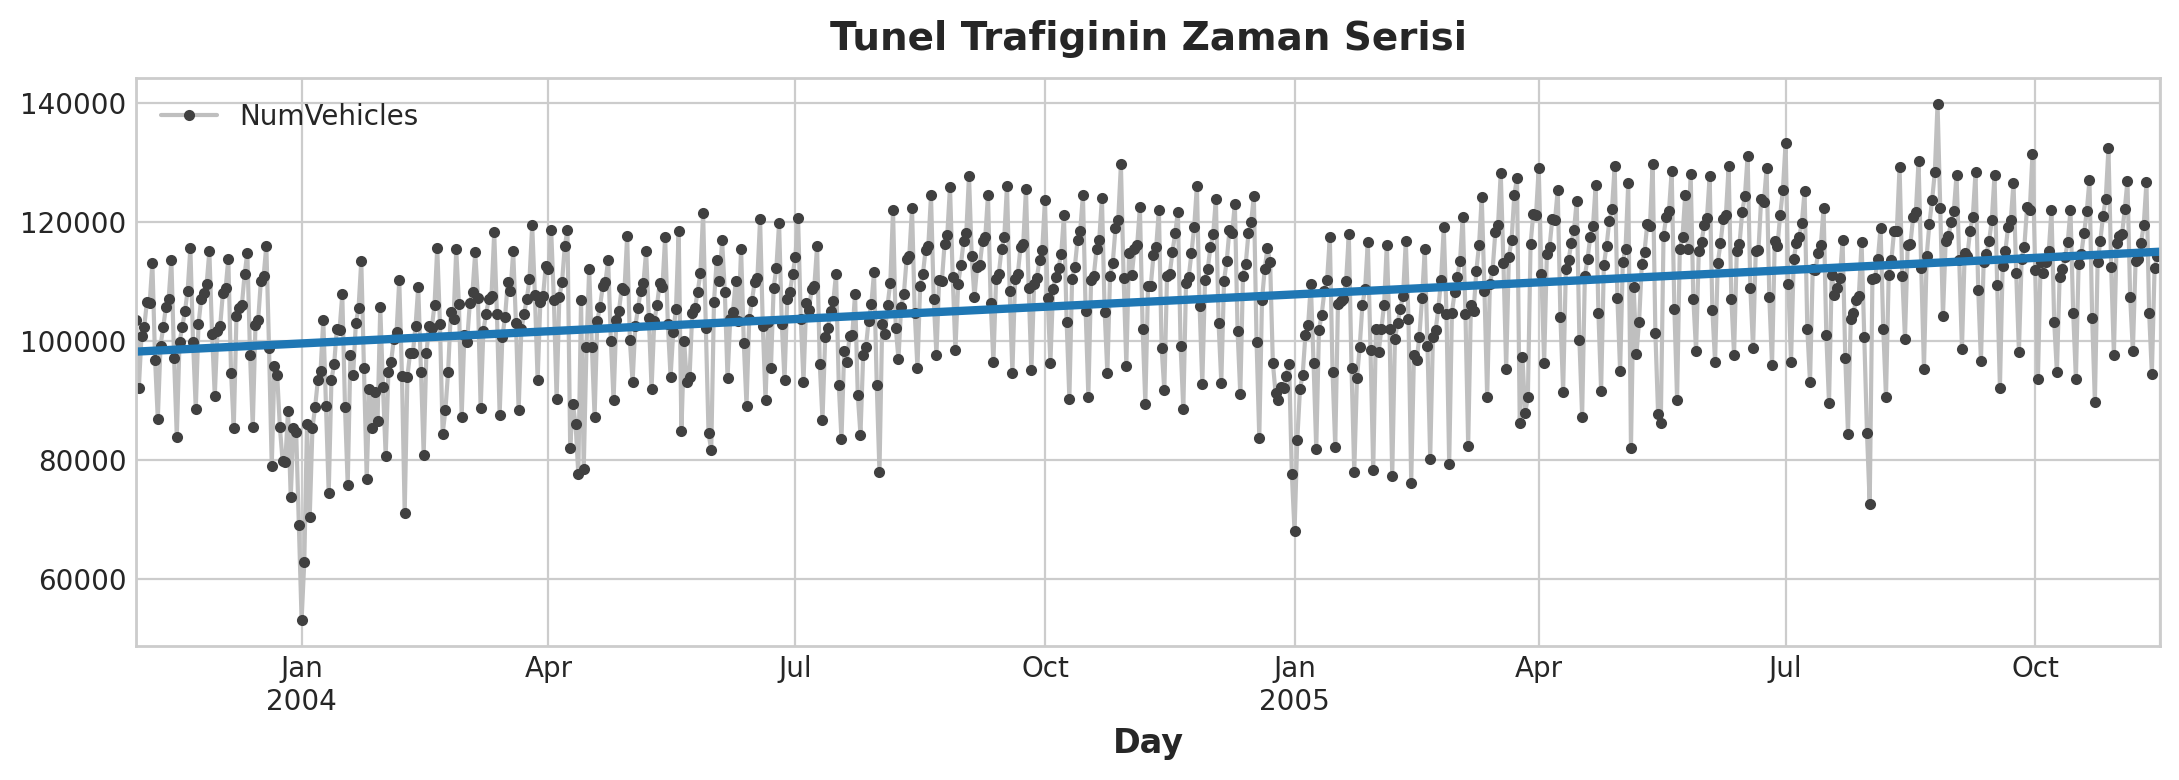

In [38]:
ax  = y.plot(**plot_params)
ax = y_pred.plot(ax = ax , linewidth = 3)
ax.set_title('Tunel Trafiginin Zaman Serisi');

In [37]:
# Lag ekleyelim

df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [ ]:
# ilk satiri cikartip modeli calisgtiralim

from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  
y = df.loc[:, 'NumVehicles']  
y, X = y.align(X, join='inner')  

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

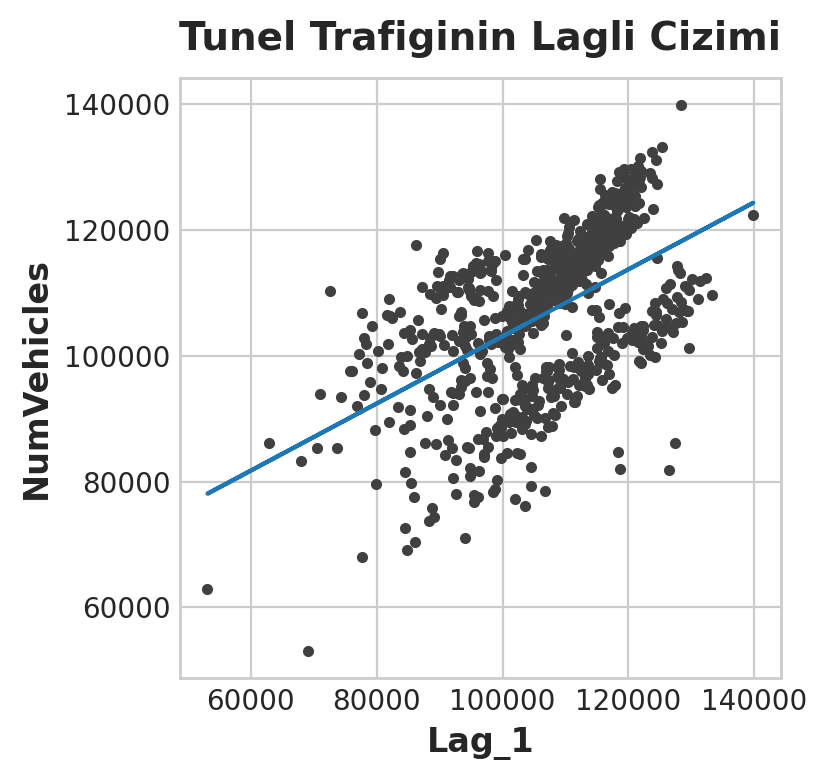

In [40]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Tunel Trafiginin Lagli Cizimi');

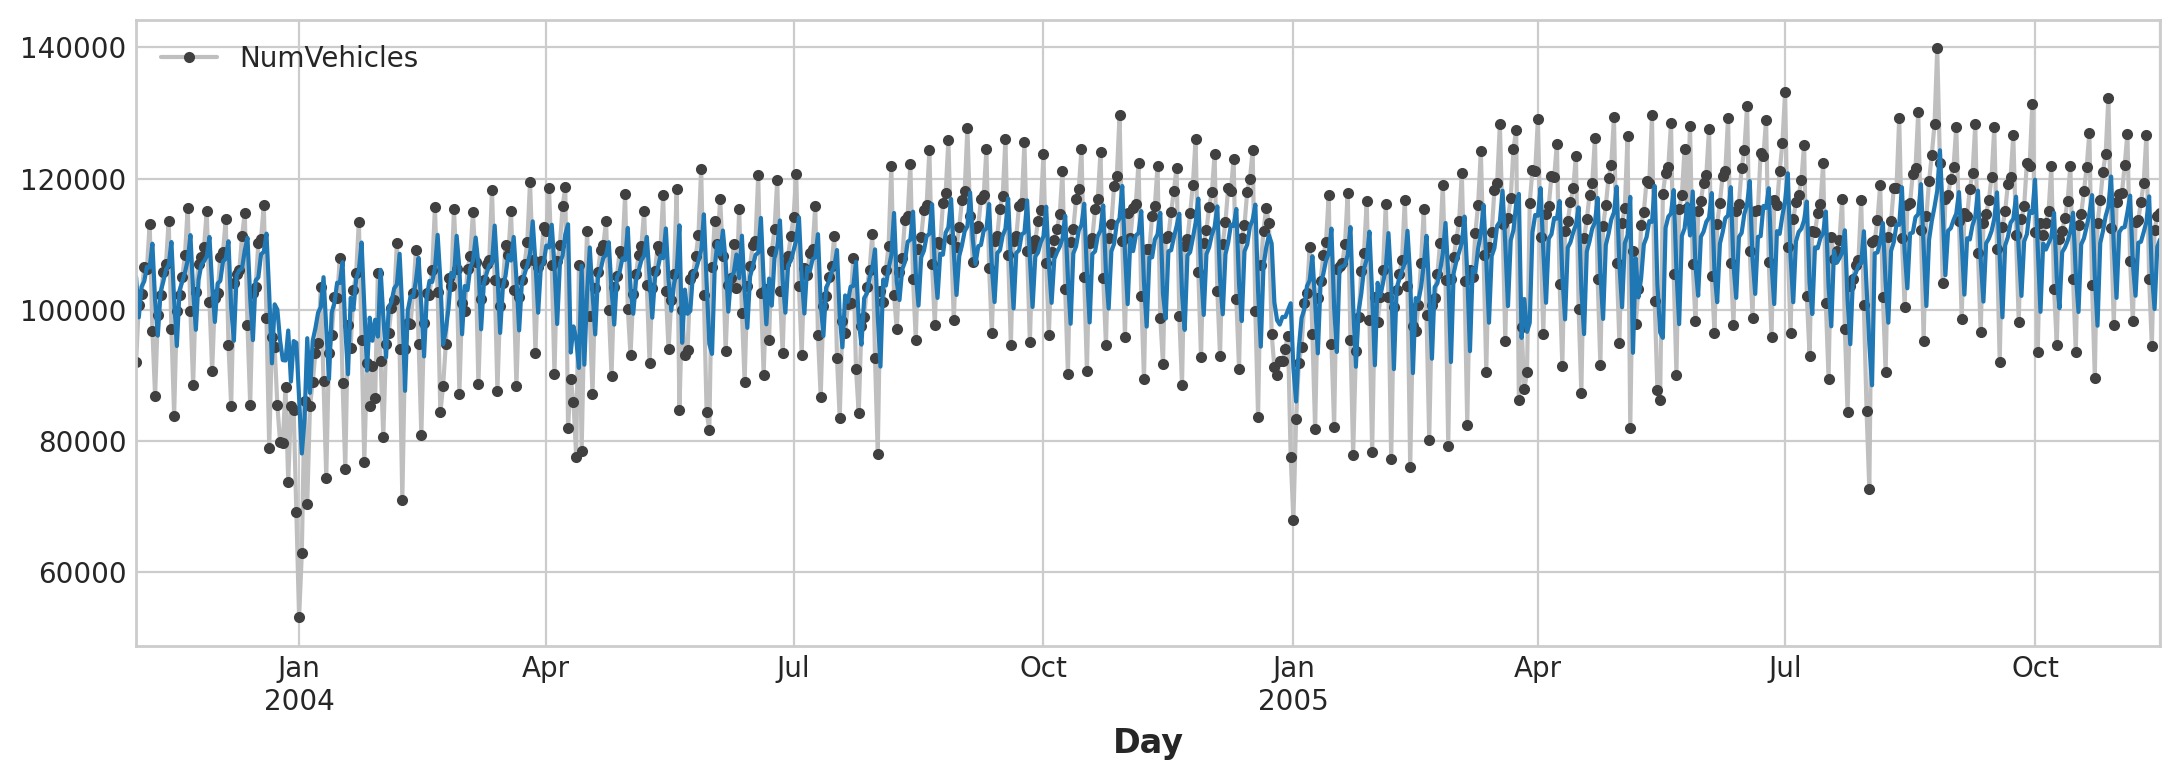

In [41]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

In [44]:
df

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0
...,...,...,...
2005-11-12,104646,742,126650.0
2005-11-13,94424,743,104646.0
2005-11-14,112165,744,94424.0


In [46]:
y_pred

Day
2003-11-02    104961.799284
2003-11-03     98840.684037
2003-11-04    103500.939302
2003-11-05    104330.767464
2003-11-06    106578.285356
                  ...      
2005-11-12    117280.776890
2005-11-13    105553.391615
2005-11-14    100105.412508
2005-11-15    109560.763451
2005-11-16    110696.514134
Freq: D, Length: 746, dtype: float64

In [47]:
# Mola 14:20-14:45